In [1]:
import csv

# Specify the path to your CSV file
csv_file_path = 'Drug_Poisoning_deaths_and_rates.csv'

data_list = []

with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)

    # Skip the header row if present
    header = next(csv_reader, None)

    # Iterate through the rows and append each row to the data_list
    for row in csv_reader:
        data_list.append(row)

In [2]:
data_list[0]

['Year',
 'Gender',
 'Intent',
 'Drug type',
 '< 1 year',
 '1-4 years',
 '5-14 years',
 '15-24 years',
 '25-34 years',
 '35-44 years',
 '45-54 years',
 '55-64 years',
 '65-74 years',
 '75-84 years',
 '85+ years',
 'Not stated',
 'All ages']

In [3]:
data_list[1]

['2021',
 'Both sexes',
 'All (preventable, intentional, undetermined)',
 'All drugs',
 '75',
 '126',
 '7426',
 '24070',
 '26908',
 '21875',
 '108',
 '19399',
 '5646',
 '800',
 '256',
 '10',
 '106699']

In [4]:
# Find the indices of 'Gender' and 'Intent' columns
gender_index = data_list[0].index('Gender')
intent_index = data_list[0].index('Intent')
drug_index = data_list[0].index('Drug type')

# Filter the data for drug poison deaths
drug_poison_data = [row for row in data_list[1:] if row[intent_index] == 'All (preventable, intentional, undetermined)' and row[drug_index] == 'All drugs' and row[gender_index] != 'Both sexes']

In [5]:
drug_poison_data[0]

['2021',
 'Female',
 'All (preventable, intentional, undetermined)',
 'All drugs',
 '35',
 '59',
 '2311',
 '6709',
 '7967',
 '6912',
 '59',
 '6122',
 '1718',
 '357',
 '148',
 '1',
 '32398']

In [6]:
# Count the occurrences of each gender in drug poison deaths
gender_counts = {'Male': 0, 'Female': 0}

for row in drug_poison_data:
    gender = row[gender_index]
    if gender == 'Male':
        gender_counts['Male'] += int(row[-1])
    else:
        gender_counts['Female'] += int(row[-1])

# Calculate the percentage of different genders
total_deaths = sum(gender_counts.values())
percentage_male = (gender_counts['Male'] / total_deaths) * 100
percentage_female = (gender_counts['Female'] / total_deaths) * 100

# Display the results
print(f"Percentage of Male deaths: {percentage_male:.2f}%")
print(f"Percentage of Female deaths: {percentage_female:.2f}%")

Percentage of Male deaths: 64.73%
Percentage of Female deaths: 35.27%


In [7]:
# Filter the data (both sex) for drug poison deaths
drug_poison_data1 = [row for row in data_list[1:] if row[intent_index] == 'All (preventable, intentional, undetermined)' and row[drug_index] == 'All drugs' and row[gender_index] == 'Both sexes']

In [8]:
drug_poison_data1[0]

['2021',
 'Both sexes',
 'All (preventable, intentional, undetermined)',
 'All drugs',
 '75',
 '126',
 '7426',
 '24070',
 '26908',
 '21875',
 '108',
 '19399',
 '5646',
 '800',
 '256',
 '10',
 '106699']

In [9]:
# Find the indices of 'Intent' and age-related columns
intent_index = data_list[0].index('Intent')
age_columns = data_list[0][4:15]  # Assuming the age columns are from index 5 to 16

# Count the occurrences of each age group in drug poison deaths
age_counts = {age: 0 for age in age_columns}

for row in drug_poison_data:
    for i, age_group in enumerate(age_columns):
        age_counts[age_group] += int(row[i + 4])  # Adjust index based on the starting column

# Calculate the percentage of different age groups
total_deaths = sum(age_counts.values())
percentage_age_groups = {age: (count / total_deaths) * 100 for age, count in age_counts.items()}

# Display the results
for age, percentage in percentage_age_groups.items():
    print(f"Percentage of {age} deaths: {percentage:.2f}%")


Percentage of < 1 year deaths: 0.07%
Percentage of 1-4 years deaths: 0.10%
Percentage of 5-14 years deaths: 0.83%
Percentage of 15-24 years deaths: 9.86%
Percentage of 25-34 years deaths: 21.63%
Percentage of 35-44 years deaths: 24.45%
Percentage of 45-54 years deaths: 23.14%
Percentage of 55-64 years deaths: 14.77%
Percentage of 65-74 years deaths: 3.62%
Percentage of 75-84 years deaths: 1.04%
Percentage of 85+ years deaths: 0.50%


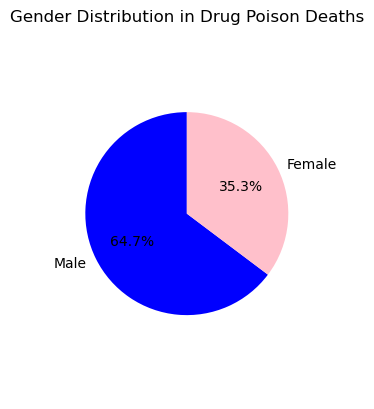

In [20]:
import matplotlib.pyplot as plt

# Plotting Gender Percentages
labels_gender = ['Male', 'Female']
sizes_gender = [percentage_male, percentage_female]
colors_gender = ['blue', 'pink']

plt.subplot(1, 2, 1)
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Gender Distribution in Drug Poison Deaths')
plt.savefig('Gender_distribution.png')  # Change the filename and format as needed
plt.show()

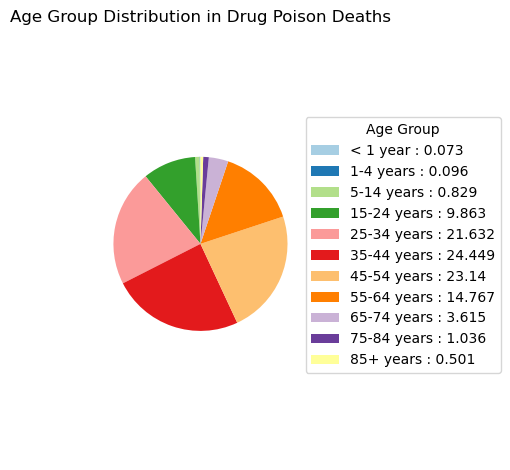

In [19]:
# Plotting Age Group Percentages
labels_age = list(percentage_age_groups.keys())
sizes_age = list(percentage_age_groups.values())
sizes_age = [round(x, 3) for x in sizes_age]

for i in range(len(labels_age)):
    labels_age[i] = labels_age[i] + " : " + str(sizes_age[i])
    
colors_age = plt.cm.Paired(range(len(labels_age)))

plt.subplot(1, 2, 2)
plt.pie(sizes_age, colors=colors_age, startangle=90)
plt.axis('equal')
plt.title('Age Group Distribution in Drug Poison Deaths')

plt.legend(labels_age, title="Age Group", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('Age_Group_distribution.png')  # Change the filename and format as needed
plt.show()

In [12]:
len(drug_poison_data1)

23

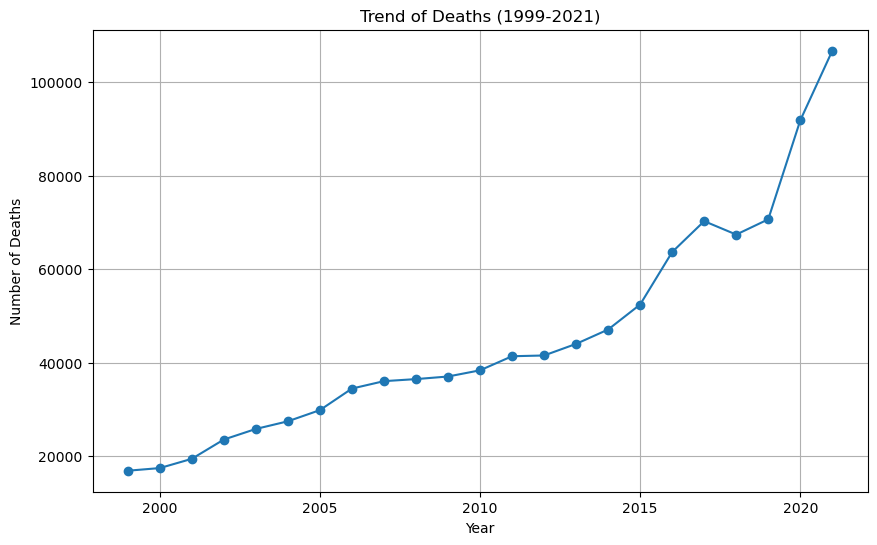

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dictionary to store the counts for each year
year_counts = {}

# Iterate through the rows, starting from index 1 (skipping the header)
for row in drug_poison_data1:
    year = int(row[0])
    year_counts[year] = int(row[-1])

# Convert the dictionary to a DataFrame for easier plotting
df = pd.DataFrame(list(year_counts.items()), columns=['Year', 'Death Count'])

# Sort the DataFrame by year
df = df.sort_values(by='Year')

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Death Count'], marker='o')
plt.title('Trend of Deaths (1999-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.savefig('year_distribution.png')  # Change the filename and format as needed
plt.show()

In [14]:
# Find the indices of 'Gender' and 'Intent' columns
gender_index = data_list[0].index('Gender')
intent_index = data_list[0].index('Intent')
drug_index = data_list[0].index('Drug type')

# Filter the data for drug poison deaths
drug_poison_data2 = [row for row in data_list[1:] if row[intent_index] == 'All (preventable, intentional, undetermined)' and row[drug_index] != 'All drugs' and row[gender_index] == 'Both sexes']

In [15]:
# Create a dictionary to store the counts for each drug type
drug_type_counts = {}

# Iterate through the rows, starting from index 1 (skipping the header)
for row in drug_poison_data2:
    drug_type = row[drug_index]

    # If the drug type is not in the dictionary, add it with a count of 1
    if drug_type not in drug_type_counts:
        drug_type_counts[drug_type] = int(row[-1])
    else:
        # If the drug type is already in the dictionary, increment the count
        drug_type_counts[drug_type] += int(row[-1])

# Calculate the total number of deaths
total_deaths = sum(drug_type_counts.values())  # Subtract 1 to exclude the header row

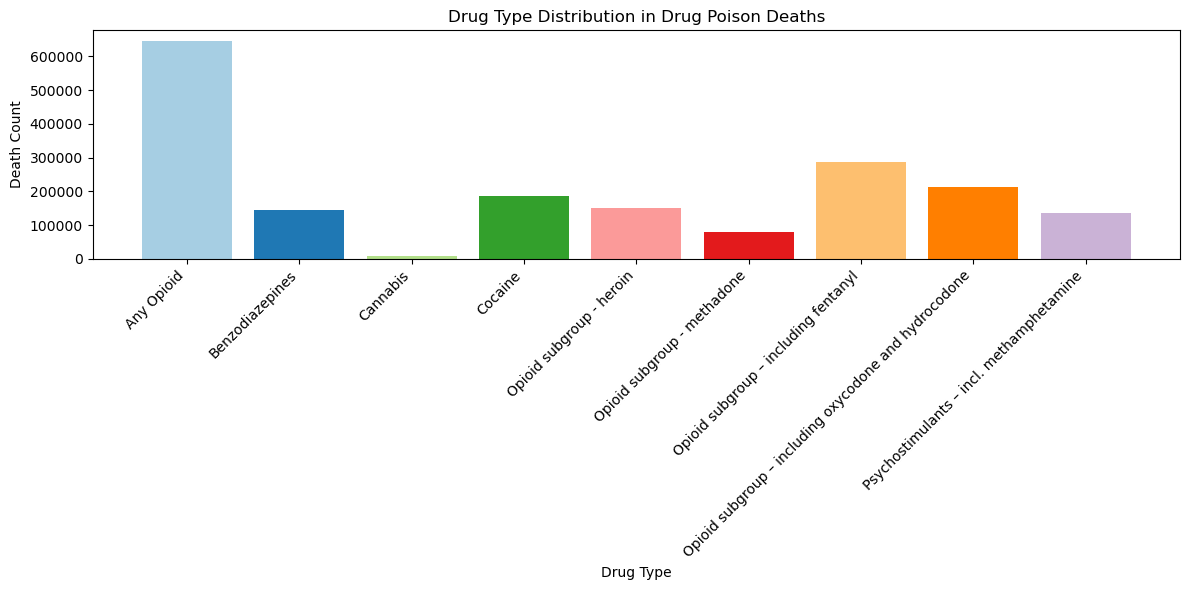

In [17]:
# Convert the dictionary to a DataFrame for easier plotting
df_drug_type = pd.DataFrame(list(drug_type_counts.items()), columns=['Drug Type', 'Death Count'])

# Plotting Drug Type Distribution as a Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(df_drug_type['Drug Type'], df_drug_type['Death Count'], color=plt.cm.Paired(range(len(df_drug_type))))
plt.title('Drug Type Distribution in Drug Poison Deaths')
plt.xlabel('Drug Type')
plt.ylabel('Death Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.savefig('drug_type_distribution.png')  # Change the filename and format as needed

# Show the plot
plt.show()